# Machine Learning Lab: Team Integreat

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
orders = pd.read_csv('data/Orders.csv')

In [3]:
orders.head()

Row.ID                  Order.ID Order.Date Ship.Date     Ship.Mode  \
0   40098  CA-2014-AB10015140-41954   11/11/14  11/13/14   First Class   
1   26341    IN-2014-JR162107-41675     2/5/14    2/7/14  Second Class   
2   25330    IN-2014-CR127307-41929   10/17/14  10/18/14   First Class   
3   13524   ES-2014-KM1637548-41667    1/28/14   1/30/14   First Class   
4   47221   SG-2014-RH9495111-41948    11/5/14   11/6/14      Same Day   

    Customer.ID     Customer.Name      Segment  Postal.Code           City  \
0  AB-100151402     Aaron Bergman     Consumer      73120.0  Oklahoma City   
1     JR-162107     Justin Ritter    Corporate          NaN     Wollongong   
2     CR-127307      Craig Reiter     Consumer          NaN       Brisbane   
3    KM-1637548  Katherine Murray  Home Office          NaN         Berlin   
4    RH-9495111       Rick Hansen     Consumer          NaN          Dakar   

        ...         Product.ID    Category Sub.Category  \
0       ...        TEC-PH-5816  Technology       Phones   
1       ...        FUR-CH-5379   Furniture       Chairs   
2       ...        TEC-PH-5356  Technology       Phones   
3       ...        TEC-PH-5267  Technology       Phones   
4       ...        TEC-CO-6011  Technology      Copiers   

                                Product.Name      Sales Quantity Discount  \
0                           Samsung Convoy 3    $221.98        2      0.0   
1  Novimex Executive Leather Armchair, Black  $3,709.40        9      0.1   
2          Nokia Smart Phone, with Caller ID  $5,175.17        9      0.1   
3             Motorola Smart Phone, Cordless  $2,892.51        5      0.1   
4             Sharp Wireless Fax, High-Speed  $2,832.96        8      0.0   

     Profit Shipping.Cost  Order.Priority  
0    $62.15         40.77            High  
1  -$288.77        923.63        Critical  
2   $919.97        915.49          Medium  
3   -$96.54        910.16          Medium  
4   $311.52        903.04        Critical  

[5 rows x 24 columns]

In [4]:
orders.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority'],
      dtype='object')

In [5]:
orders.shape

(51290, 24)

In [6]:
orders.dtypes

Row.ID              int64
Order.ID           object
Order.Date         object
Ship.Date          object
Ship.Mode          object
Customer.ID        object
Customer.Name      object
Segment            object
Postal.Code       float64
City               object
State              object
Country            object
Region             object
Market             object
Product.ID         object
Category           object
Sub.Category       object
Product.Name       object
Sales              object
Quantity            int64
Discount          float64
Profit             object
Shipping.Cost     float64
Order.Priority     object
dtype: object

In [7]:
orders.Sales.head()

0      $221.98
1    $3,709.40
2    $5,175.17
3    $2,892.51
4    $2,832.96
Name: Sales, dtype: object

In [8]:
orders.Profit.head()

0      $62.15
1    -$288.77
2     $919.97
3     -$96.54
4     $311.52
Name: Profit, dtype: object

In [9]:
orders.Sales = orders.Sales.str.replace('$','')
orders.Sales = orders.Sales.str.replace(',','')
orders.Sales = pd.to_numeric(orders.Sales)
orders.Sales.head()

0     221.98
1    3709.40
2    5175.17
3    2892.51
4    2832.96
Name: Sales, dtype: float64

In [10]:
orders.Profit = orders.Profit.str.replace('$','')
orders.Profit = orders.Profit.str.replace(',','')
orders.Profit = pd.to_numeric(orders.Profit)
orders.Profit.head()

0     62.15
1   -288.77
2    919.97
3    -96.54
4    311.52
Name: Profit, dtype: float64

In [11]:
orders['Order.Date'].head()

0    11/11/14
1      2/5/14
2    10/17/14
3     1/28/14
4     11/5/14
Name: Order.Date, dtype: object

In [12]:
orders['Order.Date'] = pd.to_datetime(orders['Order.Date'])

In [13]:
orders['Order.Date'].head()

0   2014-11-11
1   2014-02-05
2   2014-10-17
3   2014-01-28
4   2014-11-05
Name: Order.Date, dtype: datetime64[ns]

In [14]:
orders['Order.Date'].dt.month.head()

0    11
1     2
2    10
3     1
4    11
Name: Order.Date, dtype: int64

In [15]:
orders['month'] = orders['Order.Date'].dt.month

In [16]:
orders.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority', 'month'],
      dtype='object')

In [42]:
#orders.groupby('month')['Order.ID'].count()

In [29]:
orders_by_month = orders.groupby('month')

In [30]:
orders_by_month.groups

{1: Int64Index([    3,    18,    38,    39,    64,    65,    84,    93,    94,
               117,
             ...
             51103, 51108, 51121, 51123, 51133, 51138, 51183, 51189, 51199,
             51234],
            dtype='int64', length=2611),
 2: Int64Index([    1,    16,    23,    29,   118,   155,   177,   204,   215,
               249,
             ...
             50838, 50933, 50969, 50975, 50986, 51016, 51066, 51205, 51212,
             51288],
            dtype='int64', length=2209),
 3: Int64Index([    9,    10,    21,    27,    45,    46,    60,    72,   109,
               110,
             ...
             51198, 51200, 51216, 51221, 51223, 51225, 51229, 51243, 51246,
             51275],
            dtype='int64', length=3007),
 4: Int64Index([    7,    11,    28,    56,   107,   111,   113,   157,   175,
               207,
             ...
             51195, 51204, 51206, 51207, 51210, 51215, 51265, 51268, 51271,
             51272],
            dtype='int64'

In [28]:
orders_by_month['Quantity'].sum()

month
1      8872
2      7429
3     10390
4     10466
5     13196
6     18009
7     11046
8     17596
9     20479
10    16303
11    22379
12    22147
Name: Quantity, dtype: int64

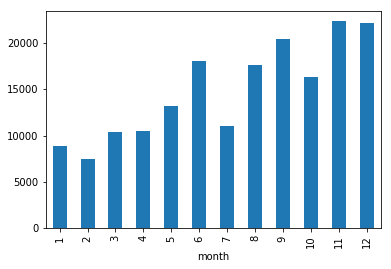

In [31]:
orders_by_month['Quantity'].sum().plot.bar()

In [35]:
#orders.groupby('month')['Order.ID'].count().plot.bar()
#plt.show()

In [43]:
orders.groupby(['month','Category'])['Quantity'].sum()

month  Category       
1      Furniture           1750
       Office Supplies     5480
       Technology          1642
2      Furniture           1494
       Office Supplies     4340
       Technology          1595
3      Furniture           2098
       Office Supplies     6283
       Technology          2009
4      Furniture           2005
       Office Supplies     6391
       Technology          2070
5      Furniture           2484
       Office Supplies     8170
       Technology          2542
6      Furniture           3434
       Office Supplies    11012
       Technology          3563
7      Furniture           2157
       Office Supplies     6618
       Technology          2271
8      Furniture           3059
       Office Supplies    11019
       Technology          3518
9      Furniture           4111
       Office Supplies    12572
       Technology          3796
10     Furniture           3323
       Office Supplies     9585
       Technology          3395
11     Furniture 

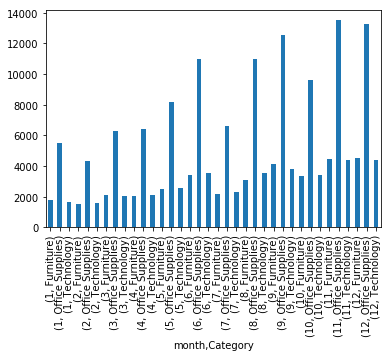

In [33]:
orders.groupby(['month','Category'])['Quantity'].sum().plot.bar()

In [34]:
#orders.groupby(['month','Category'])['Order.ID'].count().plot.bar()

In [36]:
orders.Category.unique()

array(['Technology', 'Furniture', 'Office Supplies'], dtype=object)

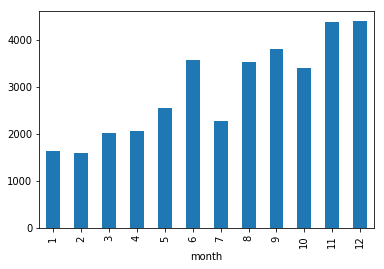

In [39]:
orders[orders.Category=='Technology'].groupby('month')['Quantity'].sum().plot.bar()

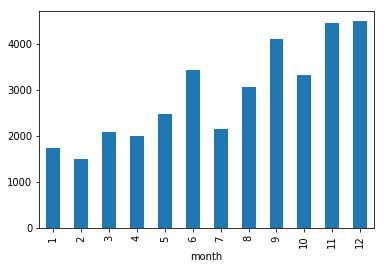

In [40]:
orders[orders.Category=='Furniture'].groupby('month')['Quantity'].sum().plot.bar()

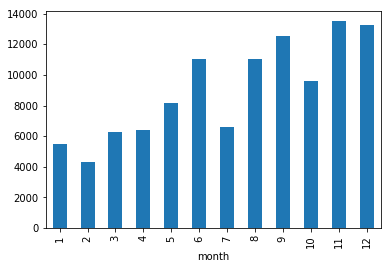

In [41]:
orders[orders.Category=='Office Supplies'].groupby('month')['Quantity'].sum().plot.bar()

In [47]:
orders.groupby(['month','Category'])['Quantity'].sum()

month  Category       
1      Furniture           1750
       Office Supplies     5480
       Technology          1642
2      Furniture           1494
       Office Supplies     4340
       Technology          1595
3      Furniture           2098
       Office Supplies     6283
       Technology          2009
4      Furniture           2005
       Office Supplies     6391
       Technology          2070
5      Furniture           2484
       Office Supplies     8170
       Technology          2542
6      Furniture           3434
       Office Supplies    11012
       Technology          3563
7      Furniture           2157
       Office Supplies     6618
       Technology          2271
8      Furniture           3059
       Office Supplies    11019
       Technology          3518
9      Furniture           4111
       Office Supplies    12572
       Technology          3796
10     Furniture           3323
       Office Supplies     9585
       Technology          3395
11     Furniture 

In [125]:
new_df  = pd.DataFrame(orders.groupby(['month','Category'])['Quantity'].sum().reset_index())

In [137]:
new_df = new_df.set_index('month')

In [138]:
new_df.head()

Category  Quantity
month                           
1            Furniture      1750
1      Office Supplies      5480
1           Technology      1642
2            Furniture      1494
2      Office Supplies      4340

In [123]:
new_df.columns

Index(['Quantity'], dtype='object')

In [60]:
type(new_df)

pandas.core.frame.DataFrame

In [63]:
new_df.dtypes

Quantity    int64
dtype: object

Category
Furniture          AxesSubplot(0.125,0.125;0.775x0.755)
Office Supplies    AxesSubplot(0.125,0.125;0.775x0.755)
Technology         AxesSubplot(0.125,0.125;0.775x0.755)
Name: Quantity, dtype: object

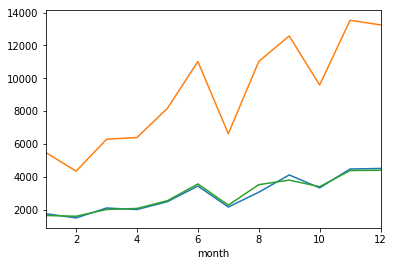

In [139]:
new_df.groupby('Category')['Quantity'].plot()

In [71]:
returns = pd.read_csv('data/returns.csv')

In [72]:
returns.head()

Returned                  Order ID        Region
0      Yes  CA-2012-SA20830140-41210    Central US
1      Yes  IN-2012-PB19210127-41259  Eastern Asia
2      Yes  CA-2012-SC20095140-41174    Central US
3      Yes    IN-2015-JH158207-42140       Oceania
4      Yes    IN-2014-LC168857-41747       Oceania

In [73]:
order_return = pd.merge(orders, returns, left_on='Order.ID', right_on = 'Order ID')

In [74]:
order_return.head()

Row.ID                  Order.ID Order.Date Ship.Date    Ship.Mode  \
0   30191  IN-2012-PB19210127-41259 2012-12-16  12/19/12  First Class   
1   30190  IN-2012-PB19210127-41259 2012-12-16  12/19/12  First Class   
2   30187  IN-2012-PB19210127-41259 2012-12-16  12/19/12  First Class   
3   30193  IN-2012-PB19210127-41259 2012-12-16  12/19/12  First Class   
4   30189  IN-2012-PB19210127-41259 2012-12-16  12/19/12  First Class   

   Customer.ID   Customer.Name    Segment  Postal.Code    City      ...       \
0  PB-19210127  Phillip Breyer  Corporate          NaN  Taipei      ...        
1  PB-19210127  Phillip Breyer  Corporate          NaN  Taipei      ...        
2  PB-19210127  Phillip Breyer  Corporate          NaN  Taipei      ...        
3  PB-19210127  Phillip Breyer  Corporate          NaN  Taipei      ...        
4  PB-19210127  Phillip Breyer  Corporate          NaN  Taipei      ...        

     Sales Quantity Discount  Profit Shipping.Cost Order.Priority month  \
0  1715.16        2      0.0  720.36        725.57       Critical    12   
1  2197.50        5      0.0  153.75        627.27       Critical    12   
2  1356.03        3      0.0  311.85        458.97       Critical    12   
3   882.15        5      0.0  114.60        203.92       Critical    12   
4   148.32        3      0.0   68.22         25.48       Critical    12   

  Returned                  Order ID      Region_y  
0      Yes  IN-2012-PB19210127-41259  Eastern Asia  
1      Yes  IN-2012-PB19210127-41259  Eastern Asia  
2      Yes  IN-2012-PB19210127-41259  Eastern Asia  
3      Yes  IN-2012-PB19210127-41259  Eastern Asia  
4      Yes  IN-2012-PB19210127-41259  Eastern Asia  

[5 rows x 28 columns]

In [76]:
order_return.shape

(2220, 28)

In [80]:
order_return['year'] = order_return['Order.Date'].dt.year

In [81]:
order_return.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region_x', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority', 'month', 'Returned',
       'Order ID', 'Region_y', 'year'],
      dtype='object')

In [84]:
order_return.head()

Row.ID                  Order.ID Order.Date Ship.Date    Ship.Mode  \
0   30191  IN-2012-PB19210127-41259 2012-12-16  12/19/12  First Class   
1   30190  IN-2012-PB19210127-41259 2012-12-16  12/19/12  First Class   
2   30187  IN-2012-PB19210127-41259 2012-12-16  12/19/12  First Class   
3   30193  IN-2012-PB19210127-41259 2012-12-16  12/19/12  First Class   
4   30189  IN-2012-PB19210127-41259 2012-12-16  12/19/12  First Class   

   Customer.ID   Customer.Name    Segment  Postal.Code    City  ...  Quantity  \
0  PB-19210127  Phillip Breyer  Corporate          NaN  Taipei  ...         2   
1  PB-19210127  Phillip Breyer  Corporate          NaN  Taipei  ...         5   
2  PB-19210127  Phillip Breyer  Corporate          NaN  Taipei  ...         3   
3  PB-19210127  Phillip Breyer  Corporate          NaN  Taipei  ...         5   
4  PB-19210127  Phillip Breyer  Corporate          NaN  Taipei  ...         3   

  Discount  Profit Shipping.Cost Order.Priority month Returned  \
0      0.0  720.36        725.57       Critical    12      Yes   
1      0.0  153.75        627.27       Critical    12      Yes   
2      0.0  311.85        458.97       Critical    12      Yes   
3      0.0  114.60        203.92       Critical    12      Yes   
4      0.0   68.22         25.48       Critical    12      Yes   

                   Order ID      Region_y  year  
0  IN-2012-PB19210127-41259  Eastern Asia  2012  
1  IN-2012-PB19210127-41259  Eastern Asia  2012  
2  IN-2012-PB19210127-41259  Eastern Asia  2012  
3  IN-2012-PB19210127-41259  Eastern Asia  2012  
4  IN-2012-PB19210127-41259  Eastern Asia  2012  

[5 rows x 29 columns]

In [88]:
order_return.groupby('year')['Profit'].sum()

year
2012    17477.26
2013     9269.89
2014    17510.63
2015    17112.97
Name: Profit, dtype: float64

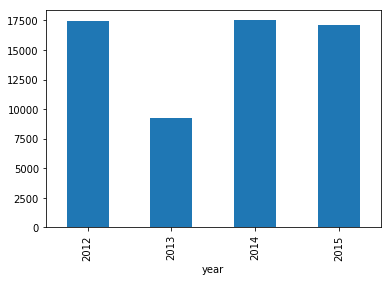

In [89]:
order_return.groupby('year')['Profit'].sum().plot.bar()

In [91]:
order_return.groupby('Customer.ID')['Returned'].count()

Customer.ID
AA-1031558      1
AA-106451404    1
AA-1064559      3
AA-1064564      1
AA-645137       1
AB-1001527      2
AB-10105101     3
AB-1015093      1
AB-10165139     2
AB-1016545      6
AB-102551404    1
AB-1025582      1
AB-1060058      3
AB-1060064      1
AB-25586        1
AB-60086        6
AC-1061558      2
AC-66038        5
AD-101801406    2
AF-1087026      2
AG-1039045      2
AG-104951402    3
AG-1049545      5
AG-1049564      2
AG-105251402    1
AG-1052518      2
AG-1052582      1
AG-106751408    2
AG-1076527      1
AG-1076539      2
               ..
TS-215051404    2
TS-2150559      5
TS-216551408    4
TT-210701408    2
TT-212201404    1
TT-212651406    1
TT-2146045      1
TW-2102578      1
TZ-1144523      1
TZ-1144577      1
TZ-2144518      2
TZ-2158093      1
VB-217451       3
VD-216701408    1
VD-2167059      2
VF-2171527      4
VG-1179038      1
VG-2180548      1
VM-218351404    2
VM-2183551      3
VP-2173048      1
VP-2173058      1
VW-217751406    1
VW-2177545      

In [121]:
df = order_return.groupby('Customer.ID')['Order.ID'].count().reset_index()
df[df['Order.ID'].apply(lambda x: x > 5)].shape[0]

46

In [95]:
new_df2 = pd.DataFrame(order_return.groupby('Customer.ID')['Returned'].count())

In [100]:
new_df2[new_df2.Returned >1].shape[0]

547

In [118]:
order_return['Order.ID'].head()

0    IN-2012-PB19210127-41259
1    IN-2012-PB19210127-41259
2    IN-2012-PB19210127-41259
3    IN-2012-PB19210127-41259
4    IN-2012-PB19210127-41259
Name: Order.ID, dtype: object

In [101]:
new_df2[new_df2.Returned >5].shape[0]

46

In [103]:
order_return.groupby('Region_x')['Returned'].count()

Region_x
Canada                15
Caribbean             69
Central Africa        17
Central America      248
Central Asia           9
Central US            74
Eastern Africa        18
Eastern Asia         131
Eastern Europe        42
Eastern US           134
North Africa          51
Northern Europe       76
Oceania              154
South America        133
Southeastern Asia    140
Southern Africa       25
Southern Asia        111
Southern Europe      112
Southern US           83
Western Africa        60
Western Asia         108
Western Europe       233
Western US           177
Name: Returned, dtype: int64

In [108]:
order_return.groupby('Region_x')['Returned'].count().sort_values(ascending = False)

Region_x
Central America      248
Western Europe       233
Western US           177
Oceania              154
Southeastern Asia    140
Eastern US           134
South America        133
Eastern Asia         131
Southern Europe      112
Southern Asia        111
Western Asia         108
Southern US           83
Northern Europe       76
Central US            74
Caribbean             69
Western Africa        60
North Africa          51
Eastern Europe        42
Southern Africa       25
Eastern Africa        18
Central Africa        17
Canada                15
Central Asia           9
Name: Returned, dtype: int64

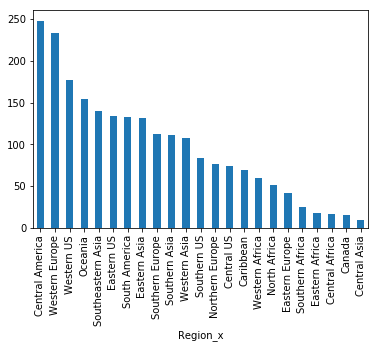

In [110]:
order_return.groupby('Region_x')['Returned'].count().sort_values(ascending = False).plot.bar()

In [109]:
order_return.groupby('Category')['Returned'].count().sort_values(ascending = False)

Category
Office Supplies    1348
Technology          445
Furniture           427
Name: Returned, dtype: int64

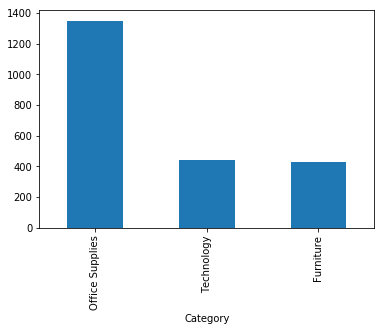

In [111]:
order_return.groupby('Category')['Returned'].count().sort_values(ascending = False).plot.bar()

In [113]:
order_return.groupby('Sub.Category')['Returned'].count().sort_values(ascending = False)

Sub.Category
Binders        269
Art            217
Storage        212
Paper          150
Chairs         147
Phones         145
Accessories    138
Labels         137
Furnishings    135
Bookcases      104
Supplies       103
Fasteners      102
Copiers         99
Envelopes       99
Machines        63
Appliances      59
Tables          41
Name: Returned, dtype: int64

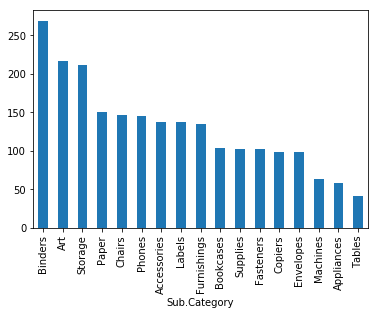

In [114]:
order_return.groupby('Sub.Category')['Returned'].count().sort_values(ascending = False).plot.bar()